In [ ]:
import pandas as pd
from dask.distributed import Client, LocalCluster
# cluster = LocalCluster()
# client = Client(cluster)
client = Client()
client


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 8,Total memory: 15.70 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:58991,Workers: 0
Dashboard: http://127.0.0.1:8787/status,Total threads: 0
Started: Just now,Total memory: 0 B
Comm: tcp://127.0.0.1:59019,Total threads: 2
Dashboard: http://127.0.0.1:59020/status,Memory: 3.93 GiB
Nanny: tcp://127.0.0.1:58994,


2025-11-12 12:07:32,804 - distributed.scheduler - WARNING - Worker failed to heartbeat for 601s; attempting restart: <WorkerState 'tcp://127.0.0.1:59010', name: 3, status: running, memory: 0, processing: 0>
2025-11-12 12:07:32,822 - distributed.scheduler - WARNING - Worker failed to heartbeat for 601s; attempting restart: <WorkerState 'tcp://127.0.0.1:59011', name: 1, status: running, memory: 0, processing: 0>
2025-11-12 12:07:32,823 - distributed.scheduler - WARNING - Worker failed to heartbeat for 601s; attempting restart: <WorkerState 'tcp://127.0.0.1:59012', name: 2, status: running, memory: 0, processing: 0>
2025-11-12 12:07:32,823 - distributed.scheduler - WARNING - Worker failed to heartbeat for 601s; attempting restart: <WorkerState 'tcp://127.0.0.1:59019', name: 0, status: running, memory: 0, processing: 0>


In [12]:
from dask import dataframe as dd

df = dd.read_csv("batch_1125-main/dask_csv_demo_files/sales_*.csv")


In [13]:
df

,order_id,customer_id,product_id,date,quantity,unit_price,total_price
npartitions=6,,,,,,,
,int64,int64,int64,string,int64,float64,float64
,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...
,...,...,...,...,...,...,...


In [14]:
df.shape

(<dask_expr.expr.Scalar: expr=ArrowStringConversion(frame=FromMapProjectable(013d4ec)).size() // 7, dtype=int64>,
 7)

In [15]:
df.npartitions

6

In [16]:
r,c = df.shape


In [17]:
r.compute()

12000

In [19]:
c.bit_count()

2

In [19]:
res = df["quantity"].mean()

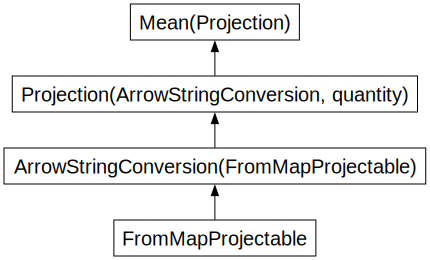

In [20]:
res.visualize()

In [22]:
df["quantity"].compute().mean()

np.float64(2.1521666666666666)

In [23]:
df.columns

Index(['order_id', 'customer_id', 'product_id', 'date', 'quantity',
       'unit_price', 'total_price'],
      dtype='object')

In [12]:
df.shape

(<dask_expr.expr.Scalar: expr=ArrowStringConversion(frame=FromMapProjectable(9ebd0a0)).size() // 7, dtype=int64>,
 7)

In [13]:
df.combine_first

<bound method FrameBase.combine_first of Dask DataFrame Structure:
              order_id customer_id product_id    date quantity unit_price total_price
npartitions=6                                                                        
                 int64       int64      int64  string    int64    float64     float64
                   ...         ...        ...     ...      ...        ...         ...
...                ...         ...        ...     ...      ...        ...         ...
                   ...         ...        ...     ...      ...        ...         ...
                   ...         ...        ...     ...      ...        ...         ...
Dask Name: to_string_dtype, 2 expressions
Expr=ArrowStringConversion(frame=FromMapProjectable(9ebd0a0))>

In [24]:
df.combine_first

<bound method FrameBase.combine_first of Dask DataFrame Structure:
              order_id customer_id product_id    date quantity unit_price total_price
npartitions=6                                                                        
                 int64       int64      int64  string    int64    float64     float64
                   ...         ...        ...     ...      ...        ...         ...
...                ...         ...        ...     ...      ...        ...         ...
                   ...         ...        ...     ...      ...        ...         ...
                   ...         ...        ...     ...      ...        ...         ...
Dask Name: to_string_dtype, 2 expressions
Expr=ArrowStringConversion(frame=FromMapProjectable(9ebd0a0))>

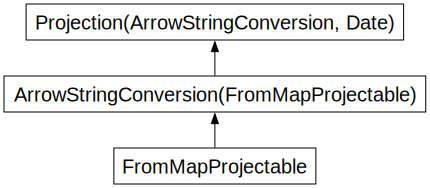

In [10]:
df['Date'].visualize()

In [9]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [23]:
res = df[df["total_price"]>100].max()

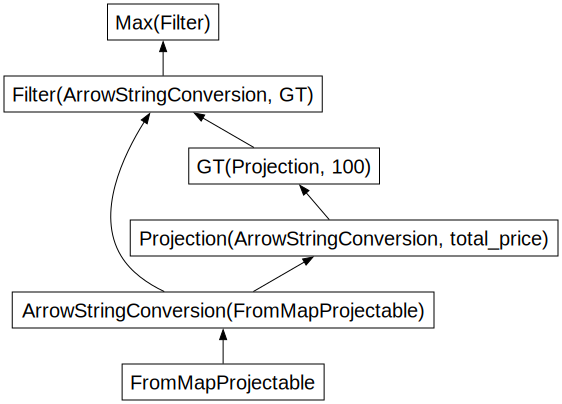

2025-11-12 12:07:36,194 - distributed.nanny - WARNING - Restarting worker
2025-11-12 12:07:36,296 - distributed.nanny - WARNING - Restarting worker
2025-11-12 12:07:36,384 - distributed.nanny - WARNING - Restarting worker
2025-11-12 12:07:36,466 - distributed.nanny - WARNING - Restarting worker


In [24]:
res.visualize()